In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.spatial import ConvexHull

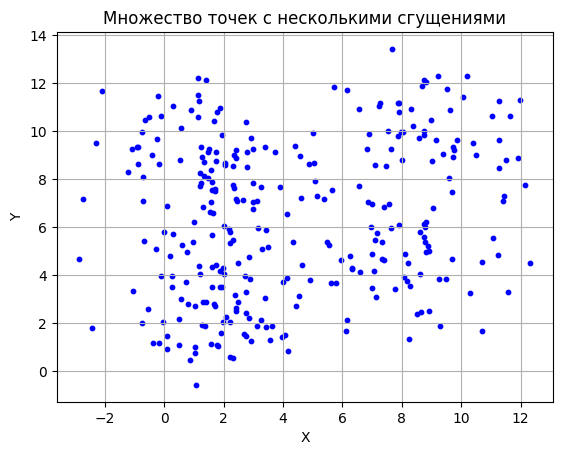

In [ ]:
def generate_cluster(center, num_points, spread):
    x = np.random.normal(center[0], spread, num_points)
    y = np.random.normal(center[1], spread, num_points)
    return np.column_stack((x, y))

def generate_points(num_clusters, points_per_cluster, cluster_spread):
    points = np.empty((0, 2))

    for _ in range(num_clusters):
        center = np.random.rand(2) * 10
        cluster = generate_cluster(center, points_per_cluster, cluster_spread)
        points = np.vstack((points, cluster))

    return points

num_clusters = 10
points_per_cluster = 30
cluster_spread = 1.5

points = generate_points(num_clusters, points_per_cluster, cluster_spread)

plt.scatter(points[:, 0], points[:, 1], s=10, c='blue', marker='o')
plt.title('Множество точек с несколькими сгущениями')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [ ]:
df = pd.DataFrame(points, columns = ['X', 'Y'])

In [ ]:
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

In [ ]:
colors = ["gold", "tab:blue", "tab:red", "tab:green", "tab:orange", "tab:brown", "tab:olive", "tab:pink", "tab:gray", "tab:cyan"]

Число кластеров = 10
silhouette_score = 0.322
Число кластеров = 9
silhouette_score = 0.327
Число кластеров = 8
silhouette_score = 0.323
Число кластеров = 7
silhouette_score = 0.358
Число кластеров = 6
silhouette_score = 0.403
Число кластеров = 5
silhouette_score = 0.434
Число кластеров = 4
silhouette_score = 0.471
Число кластеров = 3
silhouette_score = 0.423
Число кластеров = 2
silhouette_score = 0.421


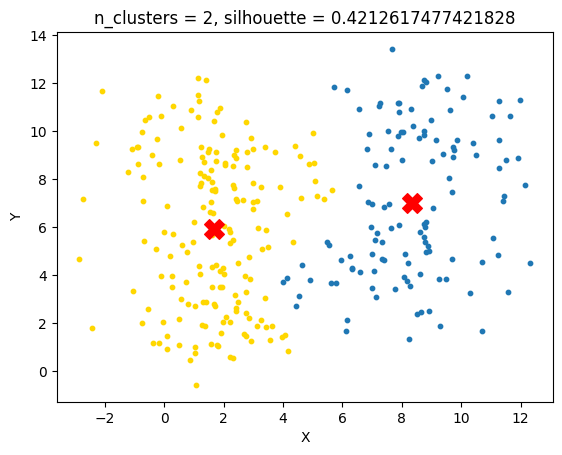

In [ ]:
silhouette_values = []
for n in range(num_clusters, 1, -1):
  clustering = AgglomerativeClustering(n_clusters=n)
  print(f'Число кластеров = {n}')
  df['cluster'] = clustering.fit_predict(points)
  current_silhouette_score = silhouette_score(points, clustering.labels_)
  print(f'silhouette_score = {round(current_silhouette_score, 3)}')
  silhouette_values.append(round(current_silhouette_score, 3))
  plt.clf()
  for i in range(n):
    plt.scatter(df.loc[clustering.labels_ == i, 'X'], df.loc[clustering.labels_ == i, 'Y'], s=10, c=colors[i], marker='o')

  cluster_centers = df.groupby('cluster')[['X', 'Y']].mean().reset_index()
  plt.scatter(cluster_centers['X'], cluster_centers['Y'], s=200, c='red', marker='X')

  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title(f'n_clusters = {n}, silhouette = {silhouette_score(points, clustering.labels_)}')

  # for i in range(n):
  #   encircle(df.loc[clustering.labels_ == i, 'X'], df.loc[clustering.labels_ == i, 'Y'], ec="k", fc=colors[i], alpha=0.2, linewidth=0)

  plt.savefig(f'{n} clusters.png')

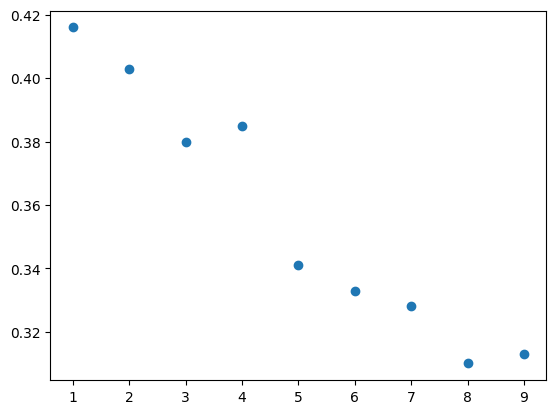

In [ ]:
plt.scatter(list(range(9, 0, -1)), silhouette_values)